In [133]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib as mpl
import numpy as np

In [134]:
trainX = pd.read_csv("train.csv").select_dtypes(exclude=['object']).dropna()
trainy = trainX.pop("SalePrice")
testX = pd.read_csv("test.csv").select_dtypes(exclude=['object'])

input_shape=[trainX.shape[1]]

In [135]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=input_shape),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1),
])

In [136]:
model.compile(
    optimizer="adam",
    loss="mae"
)


In [137]:
history = model.fit(
    trainX, trainy,
    validation_data=(trainX, trainy),
    epochs=200,)

56 - val_loss: 29425.3750
Epoch 17/200
36/36 [==============================] - 0s 3ms/step - loss: 30691.4863 - val_loss: 29159.2988
Epoch 18/200
36/36 [==============================] - 0s 2ms/step - loss: 31303.4402 - val_loss: 28933.3984
Epoch 19/200
36/36 [==============================] - 0s 2ms/step - loss: 30184.1125 - val_loss: 28753.9434
Epoch 20/200
36/36 [==============================] - 0s 2ms/step - loss: 28873.1061 - val_loss: 28646.6602
Epoch 21/200
36/36 [==============================] - 0s 2ms/step - loss: 29986.9901 - val_loss: 28579.1504
Epoch 22/200
36/36 [==============================] - 0s 2ms/step - loss: 29321.5600 - val_loss: 28491.9277
Epoch 23/200
36/36 [==============================] - 0s 2ms/step - loss: 29303.6070 - val_loss: 28264.6914
Epoch 24/200
36/36 [==============================] - 0s 2ms/step - loss: 28860.7005 - val_loss: 28180.9863
Epoch 25/200
36/36 [==============================] - 0s 2ms/step - loss: 27357.3452 - val_loss: 29159.9434
Ep

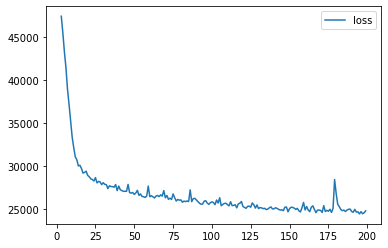

In [138]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[3:, ['loss']].plot()

In [140]:
prediction = model.predict(testX)
thePrediction = pd.DataFrame(prediction, columns=['SalePrice']).to_csv("pred1.csv")
#df = pd.read_csv('pred.csv', delim_whitespace=True, sep=r'\s*,\s*', delimiter=",")
#print(df8)
#print(df.columns.tolist()[1])
#print(df["SalePrice"])
#print(thePrediction["Id"]) 